In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import random

2024-01-18 08:53:34.261717: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-18 08:53:34.747003: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-18 08:53:34.747065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-18 08:53:34.819896: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-18 08:53:34.977694: I tensorflow/core/platform/cpu_feature_guar

In [2]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [83]:
%matplotlib inline

In [3]:
data = pd.read_csv(r"customer_churn (1).csv")

In [4]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
data = data.drop("customerID", axis=1)

In [10]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors="coerce")

In [12]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
data.fillna(0.0, inplace=True)

In [14]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
data[data.Churn == "Yes"].shape

(1869, 20)

In [17]:
data[data.Churn == "No"].shape

(5174, 20)

In [18]:
data.shape

(7043, 20)

In [19]:
1869+5174


7043

In [20]:
data_yes = data[data.Churn=="Yes"].tenure

In [21]:
data_no = data[data.Churn=="No"].tenure

In [22]:
data_yes.shape

(1869,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


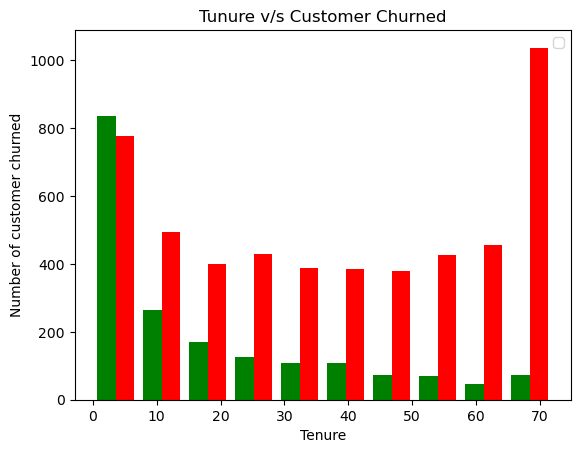

In [23]:
plt.xlabel("Tenure")
plt.ylabel("Number of customer churned")
plt.title("Tunure v/s Customer Churned")
plt.hist([data_yes,data_no],color=["green","red"])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


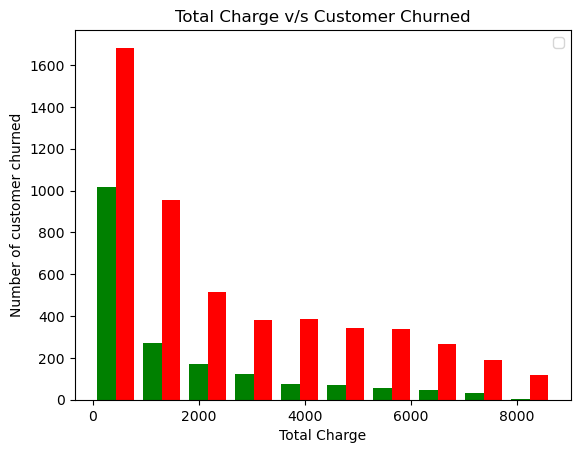

In [24]:
plt.xlabel("Total Charge")
plt.ylabel("Number of customer churned")
plt.title("Total Charge v/s Customer Churned")
plt.hist([data[data.Churn=="Yes"].TotalCharges,data[data.Churn=="No"].TotalCharges],color=["green","red"])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


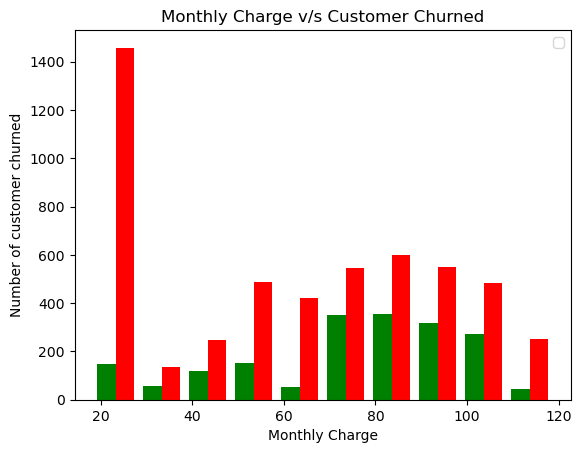

In [25]:
plt.xlabel("Monthly Charge")
plt.ylabel("Number of customer churned")
plt.title("Monthly Charge v/s Customer Churned")
plt.hist([data[data.Churn=="Yes"].MonthlyCharges,data[data.Churn=="No"].MonthlyCharges],color=["green","red"])
plt.legend()

In [26]:
data1 = pd.get_dummies(data,columns=["gender","Partner","Dependents"])

In [27]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [28]:
def unique_value(data):
    for col in data:
        print("Column :", col , "  ", data[col].unique())
    

In [29]:
unique_value(data)

Column : gender    ['Female' 'Male']
Column : SeniorCitizen    [0 1]
Column : Partner    ['Yes' 'No']
Column : Dependents    ['No' 'Yes']
Column : tenure    [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column : PhoneService    ['No' 'Yes']
Column : MultipleLines    ['No phone service' 'No' 'Yes']
Column : InternetService    ['DSL' 'Fiber optic' 'No']
Column : OnlineSecurity    ['No' 'Yes' 'No internet service']
Column : OnlineBackup    ['Yes' 'No' 'No internet service']
Column : DeviceProtection    ['No' 'Yes' 'No internet service']
Column : TechSupport    ['No' 'Yes' 'No internet service']
Column : StreamingTV    ['No' 'Yes' 'No internet service']
Column : StreamingMovies    ['No' 'Yes' 'No internet service']
Column : Contract    ['Month-to-month' 'One year' 'Two year']
Column : PaperlessBilling    ['Yes' 'No

In [30]:
data.replace("No phone service","No",inplace=True)
data.replace("No internet service","No",inplace=True)

In [31]:
ys_no_lst = ["Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

In [32]:
data["gender"].replace({"Male":1,"Female":0},inplace=True)

In [33]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,0,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,0,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,1,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [34]:
for col in ys_no_lst:
        data[col].replace({"Yes":1,"No":0},inplace=True)

In [35]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [36]:
data["PaymentMethod"].replace({"Electronic check":0,"Mailed check":1,"Bank transfer (automatic)":2,"Credit card (automatic)":3},inplace=True)

In [37]:
data["Contract"].replace({"Month-to-month":0,"One year":1,"Two year":2},inplace=True)

In [38]:
data["InternetService"].replace({"Fiber optic":1,"DSL":2,},inplace=True)

In [39]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,2,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,0,2,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [40]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
to_scale = ["tenure","MonthlyCharges","TotalCharges"]

In [43]:
scaler = MinMaxScaler()

In [44]:
data[to_scale] = scaler.fit_transform(data[to_scale])

In [45]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.003437,0
1,1,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.217564,0
2,1,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.012453,1
3,1,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.211951,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.017462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,2,1,0,1,1,1,1,1,1,1,0.662189,0.229194,0
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,3,0.845274,0.847792,0
7040,0,0,1,1,0.152778,0,0,2,1,0,0,0,0,0,0,1,0,0.112935,0.039892,0
7041,1,1,1,0,0.055556,1,1,1,0,0,0,0,0,0,0,1,1,0.558706,0.035303,1


In [46]:
X = data.drop("Churn",axis =1)

In [47]:
Y = data.Churn

In [48]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,0,2,0,1,0,0,0,0,0,1,0,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,2,1,0,1,0,0,0,1,0,1,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,2,1,1,0,0,0,0,0,1,1,0.354229,0.012453
3,1,0,0,0,0.625000,0,0,2,1,0,1,1,0,0,1,0,2,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,0,0.521891,0.017462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,2,1,0,1,1,1,1,1,1,1,0.662189,0.229194
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,3,0.845274,0.847792
7040,0,0,1,1,0.152778,0,0,2,1,0,0,0,0,0,0,1,0,0.112935,0.039892
7041,1,1,1,0,0.055556,1,1,1,0,0,0,0,0,0,0,1,1,0.558706,0.035303


In [49]:
Y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [66]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(19,),activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [67]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
177/177 [==============================] - 2s 7ms/step - loss: 0.5656 - accuracy: 0.6917
Epoch 2/100
177/177 [==============================] - 1s 7ms/step - loss: 0.5187 - accuracy: 0.7364
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4942 - accuracy: 0.7584
Epoch 4/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4786 - accuracy: 0.7650
Epoch 5/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4685 - accuracy: 0.7714
Epoch 6/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4610 - accuracy: 0.7742
Epoch 7/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4557 - accuracy: 0.7764
Epoch 8/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4516 - accuracy: 0.7813
Epoch 9/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4485 - accuracy: 0.7801
Epoch 10/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4458 - accura

177/177 [==============================] - 1s 7ms/step - loss: 0.4182 - accuracy: 0.8032
Epoch 82/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4181 - accuracy: 0.8035
Epoch 83/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4182 - accuracy: 0.8039
Epoch 84/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4182 - accuracy: 0.8046
Epoch 85/100
177/177 [==============================] - 1s 8ms/step - loss: 0.4179 - accuracy: 0.8042
Epoch 86/100
177/177 [==============================] - 1s 8ms/step - loss: 0.4179 - accuracy: 0.8037
Epoch 87/100
177/177 [==============================] - 1s 8ms/step - loss: 0.4178 - accuracy: 0.8048
Epoch 88/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4176 - accuracy: 0.8032
Epoch 89/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4177 - accuracy: 0.8037
Epoch 90/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4176 - accuracy: 

In [68]:
y_test_pred = model.predict(X_test)
y_test_pred.shape

45/45 [==============================] - 0s 3ms/step


(1409, 1)

In [69]:
y_test_pred[:6]

array([[0.38657403],
       [0.02447981],
       [0.0330637 ],
       [0.09568826],
       [0.20290811],
       [0.6404077 ]], dtype=float32)

In [72]:
y_predicted = []
for i in y_test_pred:
    if i<0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

In [86]:
len(y_predicted)

1409

In [78]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1026
           1       0.65      0.52      0.58       383

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [79]:
con_mat = tf.math.confusion_matrix(y_test,y_predicted)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


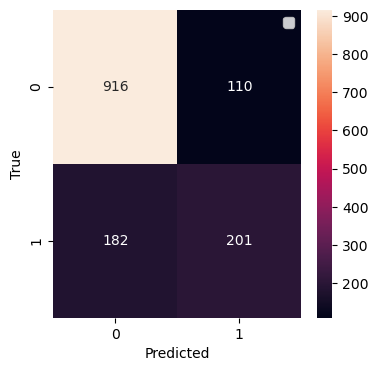

In [84]:
plt.figure(figsize=(4,4))
sns.heatmap(con_mat,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()

In [87]:
model2 = keras.Sequential([
    keras.layers.Dense(1,input_shape=(19,),activation="sigmoid",kernel_initializer=tf.keras.initializers.GlorotNormal())
])
model2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [88]:
model2.fit(X_train,y_train,epochs=100)

Epoch 1/100
177/177 [==============================] - 2s 6ms/step - loss: 0.5651 - accuracy: 0.7190
Epoch 2/100
177/177 [==============================] - 1s 6ms/step - loss: 0.5163 - accuracy: 0.7346
Epoch 3/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4870 - accuracy: 0.7472
Epoch 4/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4687 - accuracy: 0.7627
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4572 - accuracy: 0.7742
Epoch 6/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4497 - accuracy: 0.7827
Epoch 7/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4444 - accuracy: 0.7843
Epoch 8/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4407 - accuracy: 0.7859
Epoch 9/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4379 - accuracy: 0.7881
Epoch 10/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4358 - accura

177/177 [==============================] - 1s 6ms/step - loss: 0.4162 - accuracy: 0.8058
Epoch 82/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4160 - accuracy: 0.8046
Epoch 83/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4161 - accuracy: 0.8065
Epoch 84/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4159 - accuracy: 0.8055
Epoch 85/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4159 - accuracy: 0.8081
Epoch 86/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4157 - accuracy: 0.8051
Epoch 87/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4157 - accuracy: 0.8072
Epoch 88/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4157 - accuracy: 0.8064
Epoch 89/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4156 - accuracy: 0.8055
Epoch 90/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4155 - accuracy: 

In [91]:
y_test_pred = model2.predict(X_test)
y_predicted = []
for i in y_test_pred:
    if i<0.5:
        y_predicted.append(0)
    else:
        y_predicted.append(1)

45/45 [==============================] - 0s 3ms/step


In [92]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1026
           1       0.63      0.55      0.59       383

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [93]:
con_mat = tf.math.confusion_matrix(y_test,y_predicted)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


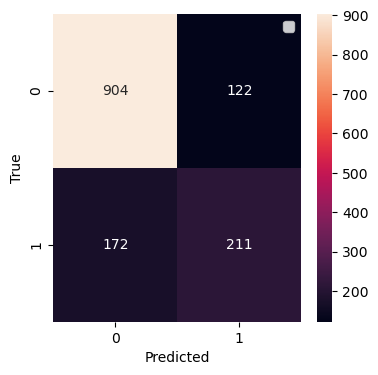

In [94]:
plt.figure(figsize=(4,4))
sns.heatmap(con_mat,annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.legend()